# Analyzing ModEM Outputs

Now that you have run a ModEM model you would like to look at the outputs and see how the model fit the data and what the model looks like.  There are a few tools in `mtpy` to help with this, though some of them are GUI base and may not run from ARE.  

## RMS plots

The first thing you might want to look at is the RMS for each station.  

In [1]:
from pathlib import Path
from mtpy.modeling.modem import Residual

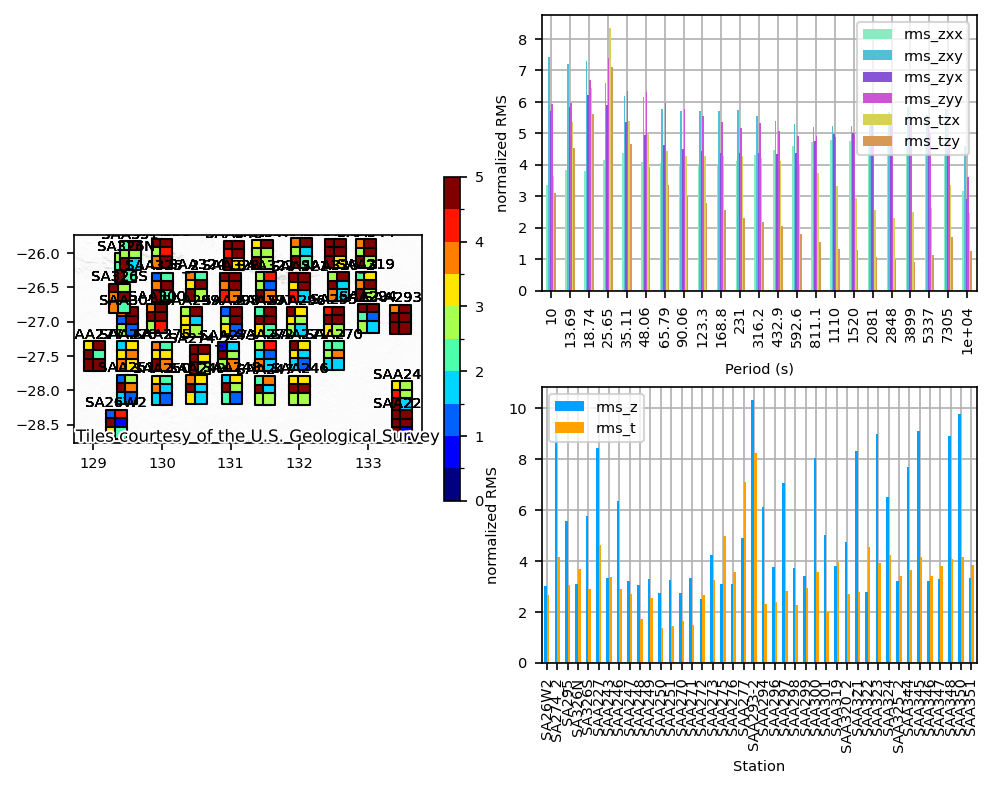

In [3]:
residual = Residual()
residual.read_residual_file(Path().cwd().joinpath("../../../scratch/nm05/shared/mtpy/MODULAR_NLCG_NLCG_007.res"))
plot_rms = residual.plot_rms(dx=.25)

## To VTK

If you want to visualize in a nice 3D viewer like Paraview or PyVista you can export to VTK.

In [1]:
from mtpy import MTData
from mtpy.modeling import StructuredGrid3D

### Station Locations

Be sure to read fromt the data file because it contains the UTM CRS for projection of the station locations to geographic coordinates.

**Note**: Some bugs in going to geographic coordinates

In [2]:
data = MTData()
data.from_modem_data(Path().cwd().joinpath("../../../scratch/nm05/shared/mtpy/musgraves_z05_t02.dat"), )
data.to_vtk(geographic=False, vtk_fn=Path().cwd().joinpath("mt_examples", "data", "modeling", "musgraves_station_locations"))

AttributeError: 'Logger' object has no attribute 'waring'

### Model

In [19]:
model = StructuredGrid3D()
model.from_modem(Path().cwd().joinpath("../../../scratch/nm05/shared/mtpy/MODULAR_NLCG_NLCG_007.rho"))
model.center_point = data.center_point
model.to_vtk(vtk_save_path=Path().cwd().joinpath("mt_examples", "data", "modeling"), vtk_fn_basename="musgraves_z05_t02_c03_007", geographic_coordinates=False)

23:11:17T11:24:53 | INFO | line:2249 |mtpy.modeling.structured_mesh_3d | to_vtk | Wrote model file to /home/005/jp0633/mt_examples/data/modeling/musgraves_z05_t02_c03_007


In [17]:
model.center_point

MT Location: 
--------------------
  Latitude (deg):   -27.267944
  Longitude (deg):  131.267928
  Elevation (m):    0.0000
  Datum crs:        EPSG:4326

  Easting (m):      130449.954
  Northing (m):     6978366.120
  UTM crs:          EPSG:28353

  Model Easting (m):      130449.954
  Model Northing (m):     6978366.120
  Model Elevation (m):    0.000
  Profile Offset (m):     0.000